In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn 

In [6]:
trueTranFn = "../transition_list/m3t_transitions_fromIROA.csv"
IDX_transFn = "data/IDX/SRM_IDX_M3T_POL.csv"

In [25]:
trueTrans = pd.read_csv(trueTranFn)
trueTrans

,Comment 20200203,Molecule List Name,Precursor Ion Name,Original Name,m3t Name,Order original plates,RT from Miriam,Retention Time ALTIS,RT Window (min),Start Time (min),End Time (min),Polarity,Precursor Mz,Product Mz,Collision Energy (V),RF Lens (V),Formula
0,ok,ALTIS,n_Adenine,Adenine,Adenine,241.0,2.69,2.54,0.6,2.32,3.08,Negative,134.047,107.054,17.17,63,C5H5N5
1,ok,ALTIS,n_Adenine,Adenine,Adenine,241.0,2.69,2.54,0.6,2.32,3.08,Negative,134.047,92.042,19.20,63,C5H5N5
2,ok,ALTIS,n_Adenine,Adenine,Adenine,241.0,2.69,2.54,0.6,2.32,3.08,Negative,134.047,65.196,28.08,63,C5H5N5
3,ok,ALTIS,p_Arginine,Arginine,Arginine,144.0,11.21,11.12,0.6,10.83,11.56,Positive,175.119,116.125,15.15,55,C6H14N4O2
4,ok,ALTIS,p_Arginine,Arginine,Arginine,144.0,11.21,11.12,0.6,10.83,11.56,Positive,175.119,70.137,23.24,55,C6H14N4O2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,NaN,n_Succinate,Succinate,Succinate,61.0,NaN,6.65,NaN,NaN,NaN,Negative,117.019,55.125,15.36,32,C4H6O4
119,NaN,NaN,n_Succinate,Succinate,Succinate,61.0,NaN,6.65,NaN,NaN,NaN,Negative,117.019,99.071,10.22,32,C4H6O4
120,ok,ALTIS,p_Tryptophan,Tryptophan,Tryptophan,98.0,4.53,4.56,0.4,4.35,4.88,Positive,205.097,188.196,11.28,40,C11H12N2O2
121,ok,ALTIS,p_Tryptophan,Tryptophan,Tryptophan,98.0,4.53,4.56,0.4,4.35,4.88,Positive,205.097,146.125,18.56,40,C11H12N2O2


In [9]:
IDX_trans = {"Positive":pd.read_csv(IDX_transFn.replace("POL","pos")),
             "Negative":pd.read_csv(IDX_transFn.replace("POL","neg"))}
IDX_trans["Positive"]

,Unnamed: 0,Name,rt_start,rt_end,Sum formula,Mass,mz,Comments,Product mz,CE,Normalized Intensity,RF
0,0,cAMP,2.82,3.71,C10H12N5O6P,329.05252,330.059796,NaN,136.06,40.0,1.493274,40
1,1,cAMP,2.82,3.71,C10H12N5O6P,329.05252,330.059796,NaN,119.04,100.0,0.300999,40
2,2,cAMP,2.82,3.71,C10H12N5O6P,329.05252,330.059796,NaN,137.05,90.0,0.115004,40
3,3,cAMP,2.82,3.71,C10H12N5O6P,329.05252,330.059796,NaN,98.98,100.0,0.080671,40
4,4,cAMP,2.82,3.71,C10H12N5O6P,329.05252,330.059796,NaN,92.02,100.0,0.075536,40
...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,Valine,4.78,5.30,C5H11NO2,117.07898,118.086256,NaN,72.08,20.0,0.932994,30
276,276,Valine,4.78,5.30,C5H11NO2,117.07898,118.086256,NaN,55.05,40.0,0.314984,30
277,277,Valine,4.78,5.30,C5H11NO2,117.07898,118.086256,NaN,57.06,60.0,0.101324,30
278,278,Valine,4.78,5.30,C5H11NO2,117.07898,118.086256,NaN,56.05,80.0,0.058683,30


In [34]:
CE_pairs = {"Positive":{},"Negative":{}}
RF_paris = {"Positive":{},"Negative":{}}
for index,row in trueTrans.iterrows():
    name = row["m3t Name"]
    tmp = IDX_trans[row["Polarity"]]
    tmp = tmp[tmp["Name"] == name]
    if len(tmp) == 0:
        print("not found",row["Polarity"],name)
    for index2,row2 in tmp.iterrows():
        if abs(row2["Product mz"] - row["Product Mz"]) < .5:
            CE_pairs[row["Polarity"]][(name,row["Precursor Mz"],row["Product Mz"])] = [row["Collision Energy (V)"],row2["CE"]]
            RF_paris[row["Polarity"]][(name,row["Precursor Mz"],row["Product Mz"])] = [row["RF Lens (V)"],row2["RF"]]
            break

not found Positive S-Adenosylmethionine
not found Positive S-Adenosylmethionine
not found Positive S-Adenosylmethionine


In [36]:

for pol in CE_pairs:
    print(len(CE_pairs[pol]))
    print(len(set([x[0] for x in CE_pairs[pol]])))

57
22
37
13


In [42]:
totalCpds = []
for pol in CE_pairs:
    totalCpds += len(set([x[0] for x in CE_pairs[pol]]))
X = []
y = []
for pol in CE_pairs:
    for entry in CE_pairs[pol]:
        X.append([1,entry[1],CE_pairs[pol][entry][1],RF_paris[pol][entry][1]])
        y.append([CE_pairs[pol][entry][0],RF_paris[pol][entry][0]])
X = np.array(X)
y = np.array(y)

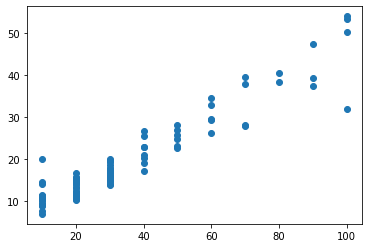

In [43]:
plt.scatter(X[:,2],y[:,0])

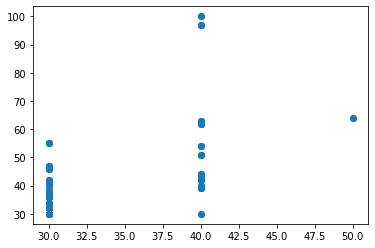

In [44]:
plt.scatter(X[:,3],y[:,1])